In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, KFold, ShuffleSplit, GridSearchCV

from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

### 1. Load the data from “glass.csv” and make a bar plot of different types of glasses. 

In [2]:
data = pd.read_csv('glass.csv')

In [3]:
data.shape

(214, 10)

In [4]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


C:\Users\YZQ8BX\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


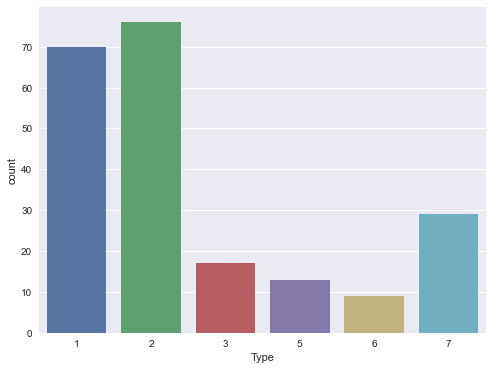

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(data["Type"])
plt.show()

### 2. Make a train_test split and fit a single decision tree classifier. 

In [12]:
X = data.iloc[:,0:9]
print(X.head())

Y = data["Type"]
print(Y.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0
0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64


In [13]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state = 5, test_size = 0.30)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(149, 9)
(65, 9)
(149,)
(65,)


In [14]:
dt_model = DecisionTreeClassifier()
dt_model.fit(train_x, train_y)

predicted = dt_model.predict(test_x)

rms = metrics.mean_squared_error(predicted, test_y)
print(rms)

print(metrics.accuracy_score(predicted, test_y))

2.1076923076923078
0.7846153846153846


### 3. Make a k-fold split with 3 splits and measure the accuracy score with each split [Hint: Refer to KFold module under sklearn’s model selection.]


In [16]:
print(cross_val_score(dt_model, X, Y, cv = 3, scoring="accuracy"))

[0.63888889 0.69014085 0.45070423]


### 4. Use gridSearchCV from sklearn for finding out a suitable number of estimators for a RandomForestClassifer along with a 10-fold cross validation 

In [20]:
rf_model = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True)

parameter_candidates = [{1},{2}]

param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, Y)
print(CV_rfc.best_params_)

{'max_features': 'auto', 'n_estimators': 200}


In [21]:
rf_model = RandomForestClassifier(n_jobs=-1,max_features= 'auto' ,n_estimators=200, oob_score = True)

cross_val_score(rf_model, X, Y, cv=10, scoring='accuracy')

C:\Users\YZQ8BX\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


array([0.63636364, 0.72727273, 0.81818182, 0.72727273, 0.66666667,
       0.80952381, 0.9047619 , 0.38095238, 0.80952381, 0.80952381])